## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice.
num_mice = len(df["Mouse ID"].unique())
print(f'There are {num_mice} mice in the dataset')

There are 249 mice in the dataset


In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = df[df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_id = duplicate_rows['Mouse ID'].unique()
print(f'The duplicate rows are from mouse {mouse_id[0]}')

The duplicate rows are from mouse g989


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = df[df['Mouse ID']==mouse_id[0]]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID']!=mouse_id[0]]

In [23]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())
print(f'There are {num_mice} mice in the clean dataset')

There are 248 mice in the clean dataset


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
col_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
col_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
col_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
col_sd = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
col_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
col_regimen = col_mean.index
summary_regimen = pd.DataFrame({'Drug Regimen': col_regimen,
                              'Mean(Tumor Vol)': col_mean,
                              'Var(Tumor Vol)': col_var,
                              'SD(Tumor Vol)': col_sd,
                              'SEM(Tumor Vol)': col_sem})
print(summary_regimen)


             Drug Regimen  Mean(Tumor Vol)  Var(Tumor Vol)  SD(Tumor Vol)  \
Drug Regimen                                                                
Capomulin       Capomulin        40.675741       24.947764       4.994774   
Ceftamin         Ceftamin        52.591172       39.290177       6.268188   
Infubinol       Infubinol        52.884795       43.128684       6.567243   
Ketapril         Ketapril        55.235638       68.553577       8.279709   
Naftisol         Naftisol        54.331565       66.173479       8.134708   
Placebo           Placebo        54.033581       61.168083       7.821003   
Propriva         Propriva        52.320930       43.852013       6.622085   
Ramicane         Ramicane        40.216745       23.486704       4.846308   
Stelasyn         Stelasyn        54.233149       59.450562       7.710419   
Zoniferol       Zoniferol        53.236507       48.533355       6.966589   

              SEM(Tumor Vol)  
Drug Regimen                  
Capomulin    

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_regimen2 = clean_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_regimen2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

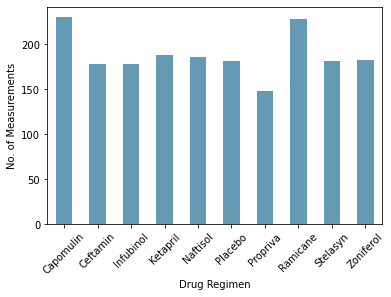

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
## total number of measurements = count of timepoints per drug regimen
measurements = clean_df.groupby("Drug Regimen").count()["Timepoint"]
measurements_bar = measurements.plot(kind="bar", color = "#659ab5")
plt.title =("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Measurements")
plt.xticks(rotation=45)

plt.show()


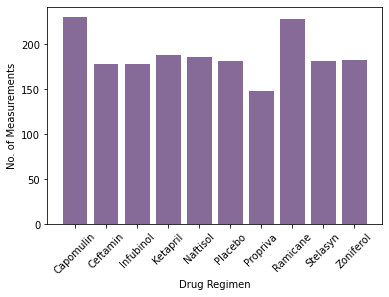

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(col_regimen))
#create ticks
tick_locs = [value for value in x_axis]
plt.bar(x_axis, measurements, color="#866b99", align="center")
plt.title =("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Measurements")
plt.xticks(ticks=tick_locs, rotation=45, labels=measurements.index)
plt.show()



In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


<class 'pandas.core.series.Series'>


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
